In [7]:
import pandas as pd

# Load the 311 service requests dataset
file_path = r"C:\Users\User\Documents\jupyter\311_Service_Requests_from_2010_to_Present_20250714 (3).csv"

# Load data
df = pd.read_csv(file_path, low_memory=False)

# Check how many rows and columns loaded
print(f"Data loaded with shape: {df.shape}")

# Verify the first 5 rows loaded correctly
df.head()


Data loaded with shape: (6683877, 41)


,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Latitude,Longitude,Location
0,63573950,12/31/2024 11:59:38 PM,01/01/2025 12:26:35 AM,NYPD,New York City Police Department,Illegal Fireworks,NaN,Street/Sidewalk,11218,AVENUE C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.640915,-73.973642,"(40.640914779776715, -73.97364216306418)"
1,63574642,12/31/2024 11:59:33 PM,01/02/2025 05:08:17 PM,NYPD,New York City Police Department,Noise - Residential,Loud Music/Party,Residential Building/House,10466,655 EAST 230 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.891872,-73.860168,"(40.89187241649303, -73.86016845296459)"
2,63581093,12/31/2024 11:59:32 PM,01/01/2025 12:18:51 AM,NYPD,New York City Police Department,Noise - Residential,Loud Music/Party,Residential Building/House,11221,150 MALCOLM X BOULEVARD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.688335,-73.930144,"(40.688334599490894, -73.93014442097454)"
3,63574822,12/31/2024 11:59:31 PM,01/01/2025 09:01:36 AM,NYPD,New York City Police Department,Noise - Residential,Loud Music/Party,Residential Building/House,10466,655 EAST 230 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.891872,-73.860168,"(40.89187241649303, -73.86016845296459)"
4,63580924,12/31/2024 11:59:21 PM,01/01/2025 12:42:47 AM,NYPD,New York City Police Department,Noise - Residential,Loud Music/Party,Residential Building/House,11230,1302 NEWKIRK AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.634745,-73.964936,"(40.6347449187686, -73.96493632865035)"


In [8]:
# Summary of dataframe: columns, data types, non-null counts
df.info()

# Count missing values per column
print("\nMissing values per column:")
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6683877 entries, 0 to 6683876
Data columns (total 41 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   Unique Key                      int64  
 1   Created Date                    object 
 2   Closed Date                     object 
 3   Agency                          object 
 4   Agency Name                     object 
 5   Complaint Type                  object 
 6   Descriptor                      object 
 7   Location Type                   object 
 8   Incident Zip                    object 
 9   Incident Address                object 
 10  Street Name                     object 
 11  Cross Street 1                  object 
 12  Cross Street 2                  object 
 13  Intersection Street 1           object 
 14  Intersection Street 2           object 
 15  Address Type                    object 
 16  City                            object 
 17  Landmark                   

In [10]:
# Convert 'Created Date' to datetime
df['Created Date'] = pd.to_datetime(df['Created Date'], errors='coerce')

# Drop rows where 'Created Date' could not be converted (optional)
df = df.dropna(subset=['Created Date'])

# Verify conversion worked
print(df['Created Date'].head())


0   2024-12-31 23:59:38
1   2024-12-31 23:59:33
2   2024-12-31 23:59:32
3   2024-12-31 23:59:31
4   2024-12-31 23:59:21
Name: Created Date, dtype: datetime64[ns]


In [11]:
# Top 10 complaint types
top_complaints = df['Complaint Type'].value_counts().head(10)
print(top_complaints)

# Count complaints per year
complaints_by_year = df.groupby(df['Created Date'].dt.year).size()
print(complaints_by_year)


Complaint Type
Illegal Parking            982542
Noise - Residential        677750
HEAT/HOT WATER             494255
Blocked Driveway           336622
Noise - Street/Sidewalk    310451
UNSANITARY CONDITION       236343
Street Condition           137447
Noise - Commercial         136096
Abandoned Vehicle          135272
PLUMBING                   127279
Name: count, dtype: int64
Created Date
2023    3225557
2024    3458320
dtype: int64


In [14]:
print(1e6)       # Outputs: 1000000.0
print(int(1e6))  # Outputs: 1000000


1000000.0
1000000


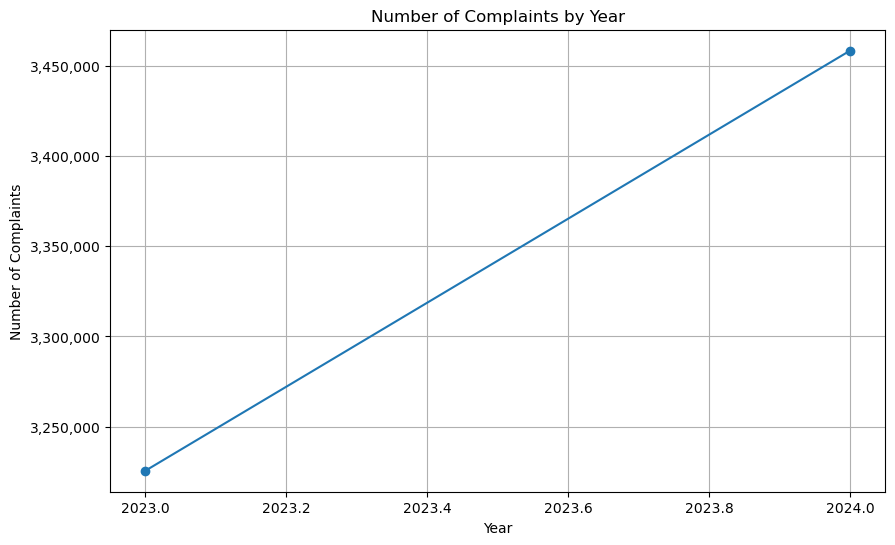

In [15]:
import matplotlib.ticker as ticker

plt.figure(figsize=(10,6))
complaints_by_year.plot(kind='line', marker='o')
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.title('Number of Complaints by Year')
plt.xlabel('Year')
plt.ylabel('Number of Complaints')
plt.grid(True)
plt.show()


<function matplotlib.pyplot.ylabel(ylabel: 'str', fontdict: 'dict[str, Any] | None' = None, labelpad: 'float | None' = None, *, loc: "Literal['bottom', 'center', 'top'] | None" = None, **kwargs) -> 'Text'>

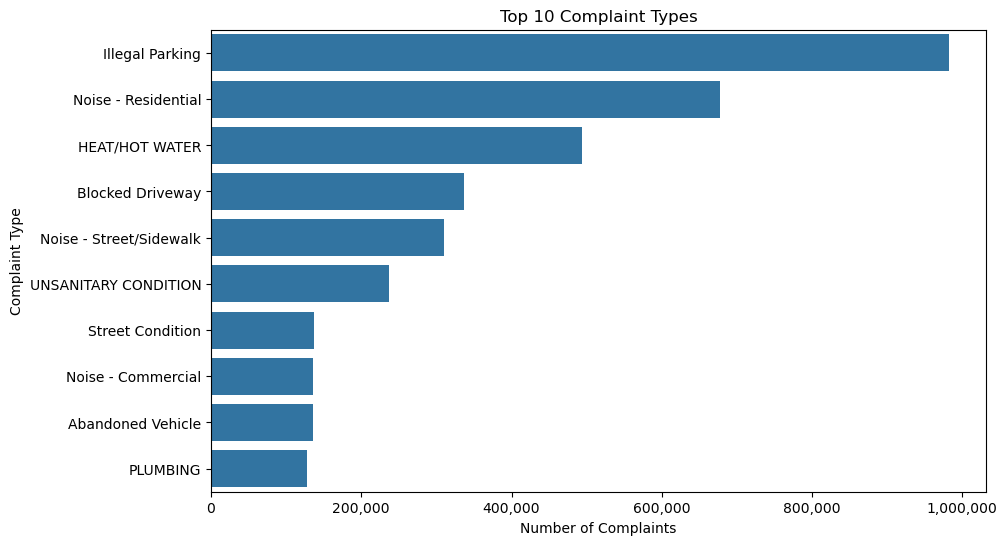

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

# Get top 10 complaint types
top_complaints = df['Complaint Type'].value_counts().head(10)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=top_complaints.values, y=top_complaints.index)

# Format x-axis numbers with commas
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))

plt.title('Top 10 Complaint Types')
plt.xlabel('Number of Complaints')
plt.ylabel


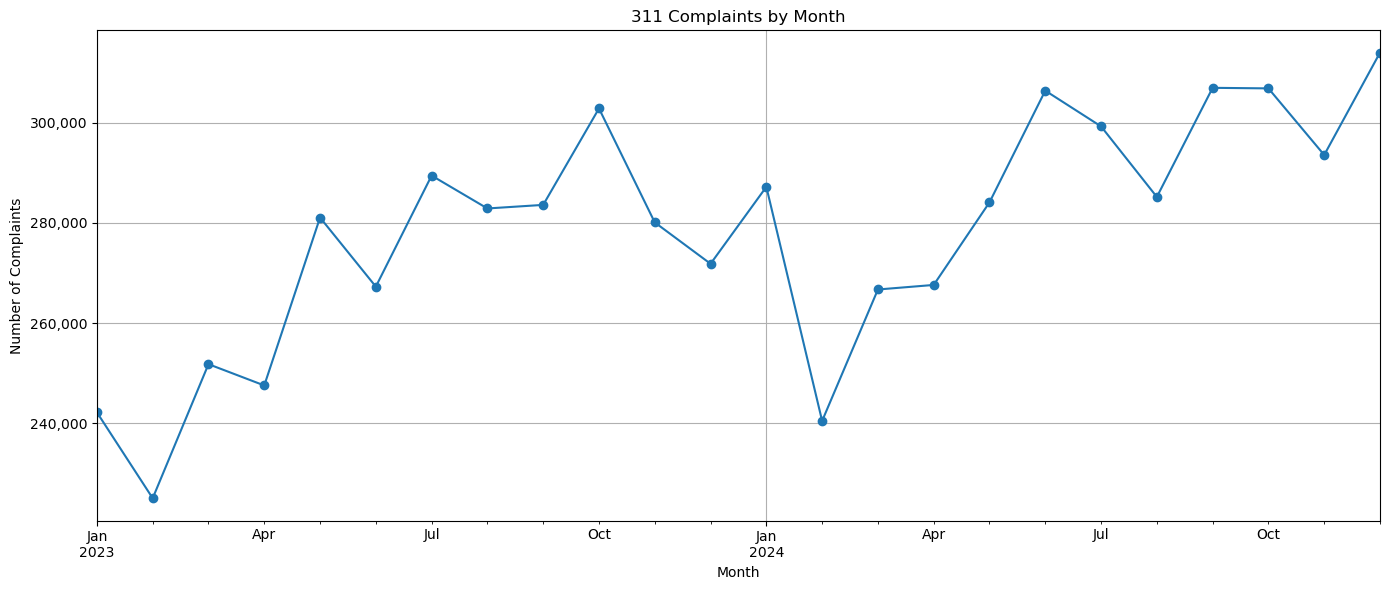

In [17]:
# Group by month
complaints_by_month = df.groupby(df['Created Date'].dt.to_period('M')).size()

# Convert period index to datetime for plotting
complaints_by_month.index = complaints_by_month.index.to_timestamp()
complaints_by_month = complaints_by_month.sort_index()

# Plot
plt.figure(figsize=(14, 6))
complaints_by_month.plot(kind='line', marker='o')

# Format y-axis with commas
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))

plt.title('311 Complaints by Month')
plt.xlabel('Month')
plt.ylabel('Number of Complaints')
plt.grid(True)
plt.tight_layout()
plt.show()


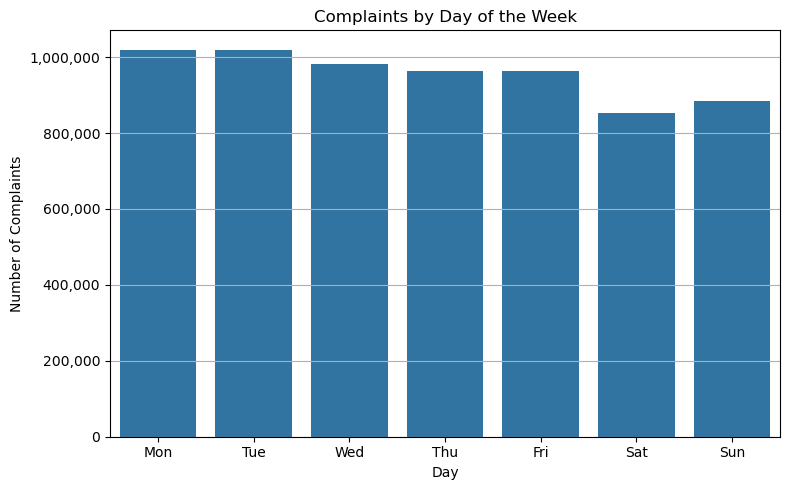

In [18]:
# Extract day of the week from Created Date (0 = Monday, 6 = Sunday)
df['Day of Week'] = df['Created Date'].dt.dayofweek

# Map numbers to day names
day_map = {0: 'Mon', 1: 'Tue', 2: 'Wed', 3: 'Thu', 4: 'Fri', 5: 'Sat', 6: 'Sun'}
df['Day of Week'] = df['Day of Week'].map(day_map)

# Count complaints by day of week
complaints_by_day = df['Day of Week'].value_counts().reindex(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x=complaints_by_day.index, y=complaints_by_day.values)

# Format y-axis with commas
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))

plt.title('Complaints by Day of the Week')
plt.xlabel('Day')
plt.ylabel('Number of Complaints')
plt.tight_layout()
plt.grid(True, axis='y')
plt.show()


In [19]:
# Check column names to make sure 'Borough' exists
print(df.columns)

# Preview borough data
print(df['Borough'].value_counts(dropna=False))


Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'BBL', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Open Data Channel Type',
       'Park Facility Name', 'Park Borough', 'Vehicle Type',
       'Taxi Company Borough', 'Taxi Pick Up Location', 'Bridge Highway Name',
       'Bridge Highway Direction', 'Road Ramp', 'Bridge Highway Segment',
       'Latitude', 'Longitude', 'Location', 'Day of Week'],
      dtype='object')
Borough
BROOKLYN         2047219
QUEENS           1604444
MANHATTAN        1408383
BRONX            1365906
STATEN ISLAND     249279
U

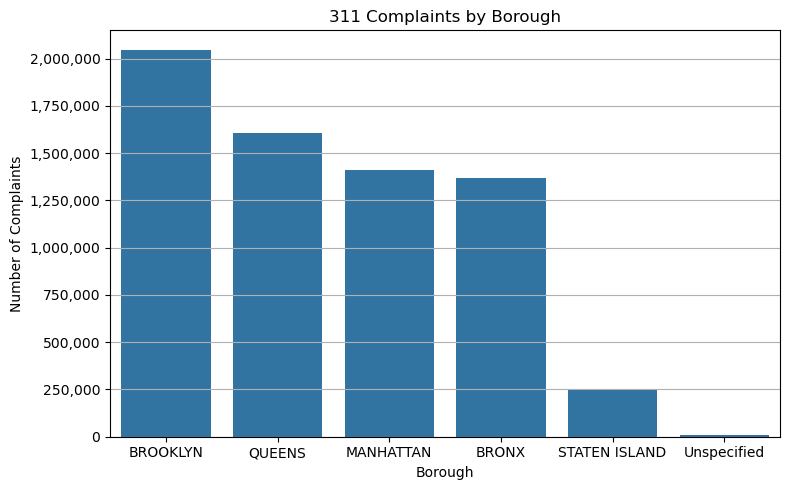

In [20]:
import matplotlib.ticker as ticker
import seaborn as sns
import matplotlib.pyplot as plt

# Count complaints per borough
complaints_by_borough = df['Borough'].value_counts()

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x=complaints_by_borough.index, y=complaints_by_borough.values)

# Format y-axis numbers with commas
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))

plt.title('311 Complaints by Borough')
plt.xlabel('Borough')
plt.ylabel('Number of Complaints')
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()
